# DBSCAN Clustering Algorithm

## Step 1: Importing all the necessary packages

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2: Loading the dataset from csv file

In [7]:
iris_df = pd.read_csv('iris/iris.data')
iris_df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Step 3: Data Preprocessing
As we can see, we need to add column headers to define the feature names and remove the species columns from our dataset.

In [29]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv('iris/iris.data', header=None, names=columns)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Now we will remove the unnecessary column species

In [10]:
X = iris_df.drop(columns=['species'], errors='ignore')

We will now standardize our data.

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# displaying the scaled data
pd.DataFrame(X_scaled, columns=X.columns)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


As you can see, each feature is scaled so that its mean is 0 and its standard deviation is 1.

## Step 4: Find Optimal value of ε(epsilon) 

In [31]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

Sort distances for plotting

In [32]:
distances = np.sort(distances[:, 3])

Plotting k-distance graph

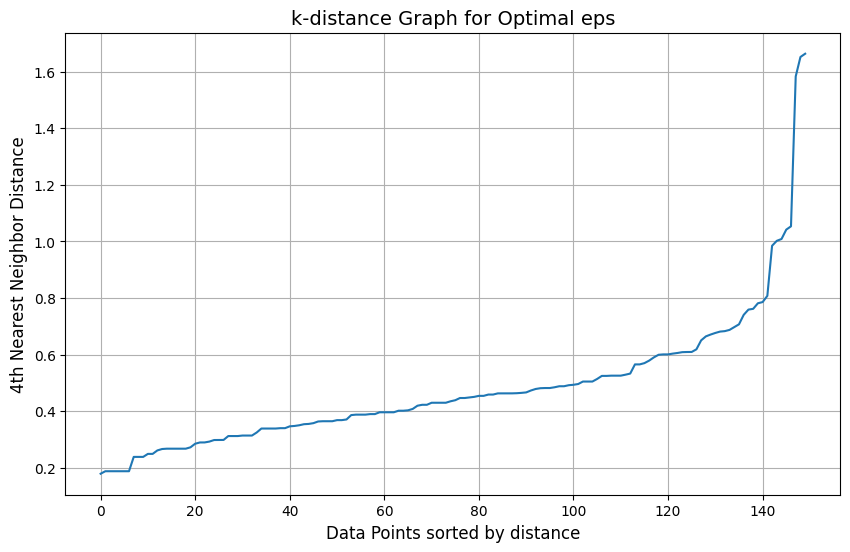

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance', fontsize=12)
plt.ylabel('4th Nearest Neighbor Distance', fontsize=12)
plt.title('k-distance Graph for Optimal eps', fontsize=14)
plt.grid(True)
plt.show()

As we can see, at `0.8`, there is a sharp increase. Hence choosing `epsilon=0.8` as the optimal value.  

## Step 4: Apply DBSCAN with the Optimal Epsilon
Taking **Epsilon**=0.8 and **min_pts**=5

In [34]:
optimal_eps = 0.8  

dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

iris_df['cluster'] = dbscan_labels

# Check the data with cluster labels
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


- A new column called `cluster` has been added which contains the **cluster labels**(0, 1, 2, ...)
- Points labeled as `-1` are **noise points** or outliers.

## Step 5: Visualizing the Clusters in 2D
Since there are four features in the Iris dataset, we can create pairplots for each combination of features.

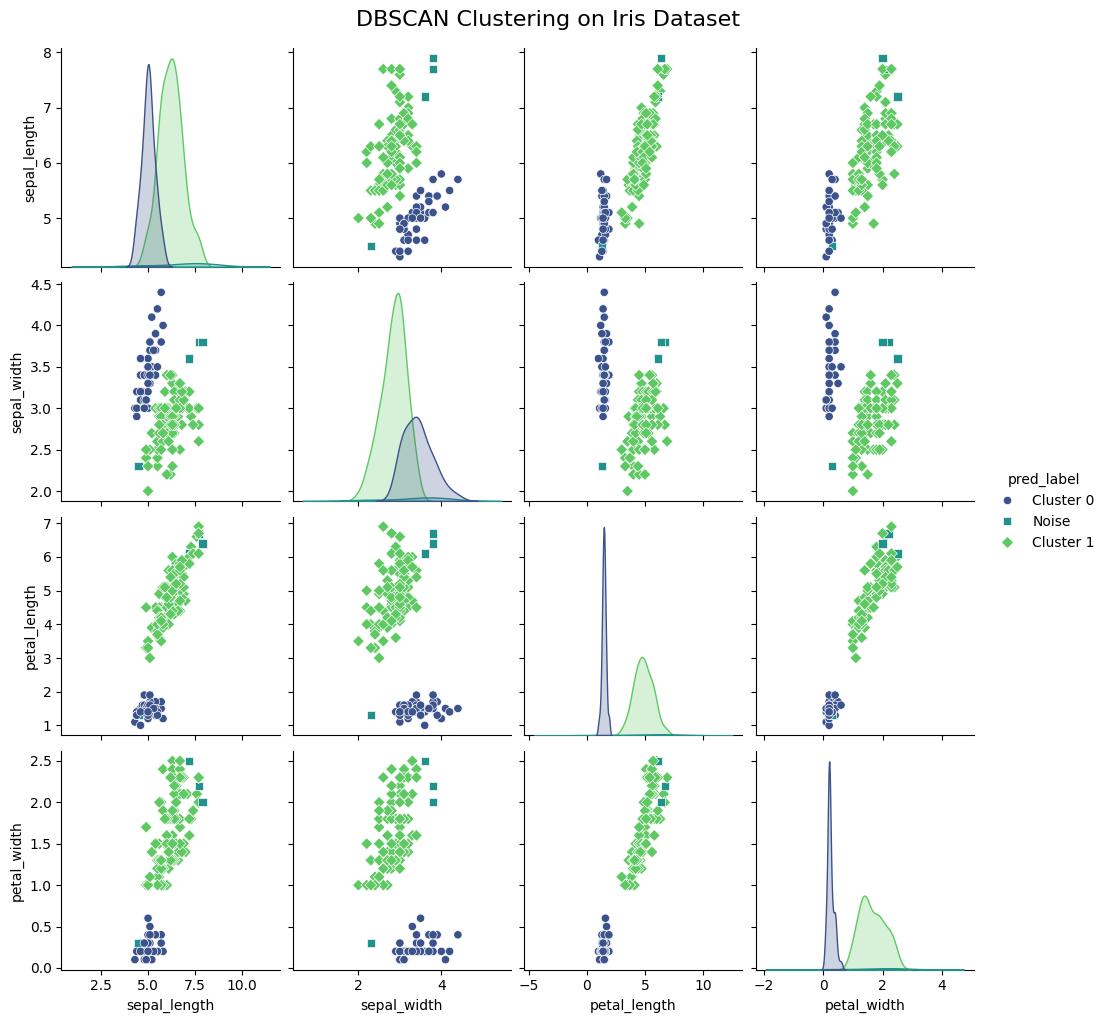

In [35]:
iris_df['pred_label'] = iris_df['cluster'].apply(lambda x: 'Noise' if x == -1 else f'Cluster {x}')
pairplot_data = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'pred_label']]
# Plot the pairplot for all features,color-coded by predicted label
sns.pairplot(pairplot_data, hue='pred_label', diag_kind="kde", palette="viridis", markers=["o", "s", "D"])

plt.suptitle('DBSCAN Clustering on Iris Dataset', y=1.02, fontsize=16)
plt.show()

## Step 6: Evaluating the clusters
We can check:
- How many points were assigned to each cluster.
- How many points were classified as noise (label -1).
- The total number of valid clusters.

In [37]:
cluster_counts = iris_df['pred_label'].value_counts()
print("Cluster Counts:")
print(cluster_counts.to_string(index=True))

# Count valid clusters (excluding noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

#Count noise points
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")

Cluster Counts:
pred_label
Cluster 1    97
Cluster 0    49
Noise         4
Number of clusters (excluding noise): 2
Number of noise points: 4
